<a href="https://colab.research.google.com/github/zaaraquadrii/Zaara_Projects_Labs/blob/main/Module_2_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2: Appreciating, Interpreting and Visualizing Data
## Project
---



From 2020 to 2022, we have been severely affected by the COVID-19 pandemic. And if you would know a little about it, you would have heard about **SARS-CoV-2** (Severe Acute Respiratory Syndrome Coronavirus 2) which is the virus responsible for the COVID-19 disease.

A little biology might intrigue you further. This SARS-CoV-2 is a RNA virus and when this virus enters your body, it interacts with the ACE-2 receptor using its Spike protein. When this happens, it gets access to be able to multiply inside your body, ultimately resulting in you getting infected with the COVID-19 disease.

Before I explain you the details of the project and what you will be doing, let me first introduce you to what a virus genome is. Every living organism in this world has someting called a Nucleus which produces its characteristic genome sequence. Even your body has a genome and it will be very different from that of lets say a cat. Now, this SARS-CoV-2 virus also has its characteristic genome sequence and it is roughly of the length 29000 bases. A little more Class 9 biology lesson: Each genome is built up with just 4 characters called bases (A, T, G and C).

For this project, I will provide you with some SARS-CoV-2 genomes collected from infected people in India and you will use just the Visualization techniques you learnt in the module to analyze the genomes and infer the spread of the COVID-19 disease in the country.

685 genome sequences from India downloaded from GISAID (https://www.gisaid.org/) in early to mid 2020 have been provided to you in the _sequences.fasta_ file and some cleaned metadata regarding these sequences has been given in the _INDIA_685.csv_ file.


> Please download the required files from [here](https://drive.google.com/drive/folders/1rLMKfsEaJ3CordYxDlEbjssVwZVWIyyO?usp=sharing) and upload when asked.

In [19]:
import pandas as pd

metadata_df = pd.read_csv('INDIA_685.csv')
display(metadata_df.head())

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts
0,hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27,EPI_ISL_413522,Asia / India / Kerala,Kerala,Human,Female,20,Recovered,27/01/2020,Indian Council of Medical Research - National ...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['T2277C', 'C6695T', 'C14657T', 'C17373T', 'G2..."
1,hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31,EPI_ISL_413523,Asia / India / Kerala,Kerala,Human,Male,23,Recovered,31/01/2020,Indian Council of Medical Research-National In...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['A1691G', 'C6501T', 'C8782T', 'C16877T', 'C24..."
2,hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10,EPI_ISL_424361,Asia / India,Stateless,Human,Female,33,NaN,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['G7C', 'C884T', 'G1397A', 'G8653T', 'G11083T'..."
3,hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10,EPI_ISL_421662,Asia / India,Stateless,Human,Male,68,unknown,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'A3472G', 'G8653T', 'T9318..."
4,hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10,EPI_ISL_421663,Asia / India,Stateless,Human,Male,45,unknown,10/03/2020,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'C2141A', 'A3472G', 'G8653..."


In [20]:
metadata_df['Collection_date'] = pd.to_datetime(metadata_df['Collection_date'], format='%d/%m/%Y')
metadata_df['Collection_date_only'] = metadata_df['Collection_date'].dt.date
display(metadata_df.head())

,StrainID,Accession_ID,Location,State,Host,Gender,Patient age,Patient status,Collection_date,Originating lab,Authors,Nuc_muts,Collection_date_only
0,hCoV-19/India/1-27/2020|EPI_ISL_413522|2020-01-27,EPI_ISL_413522,Asia / India / Kerala,Kerala,Human,Female,20,Recovered,2020-01-27,Indian Council of Medical Research - National ...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['T2277C', 'C6695T', 'C14657T', 'C17373T', 'G2...",2020-01-27
1,hCoV-19/India/1-31/2020|EPI_ISL_413523|2020-01-31,EPI_ISL_413523,Asia / India / Kerala,Kerala,Human,Male,23,Recovered,2020-01-31,Indian Council of Medical Research-National In...,"Potdar V, Yadav PD, Choudhary ML, Shete-Aich A","['A1691G', 'C6501T', 'C8782T', 'C16877T', 'C24...",2020-01-31
2,hCoV-19/India/1063/2020|EPI_ISL_424361|2020-03-10,EPI_ISL_424361,Asia / India,Stateless,Human,Female,33,NaN,2020-03-10,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['G7C', 'C884T', 'G1397A', 'G8653T', 'G11083T'...",2020-03-10
3,hCoV-19/India/1073/2020|EPI_ISL_421662|2020-03-10,EPI_ISL_421662,Asia / India,Stateless,Human,Male,68,unknown,2020-03-10,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'A3472G', 'G8653T', 'T9318...",2020-03-10
4,hCoV-19/India/1093/2020|EPI_ISL_421663|2020-03-10,EPI_ISL_421663,Asia / India,Stateless,Human,Male,45,unknown,2020-03-10,"National Influenza Center, Indian Council of M...","Pragya D. Yadav, Varsha Potdar, Savita Patil, ...","['C884T', 'G1397A', 'C2141A', 'A3472G', 'G8653...",2020-03-10


In [21]:
sequence_counts = metadata_df.groupby('Collection_date_only').size().rename('count')
display(sequence_counts.head())

,count
Collection_date_only,
2020-01-27,1
2020-01-31,1
2020-02-29,1
2020-03-01,1
2020-03-02,1


In [22]:
state_counts = metadata_df.groupby('State').size().rename('count')
display(state_counts.head())

,count
State,
Andhra Pradesh,2
Assam,2
Bihar,6
Delhi,76
Gujarat,201


In [23]:
temporal_geo_counts = metadata_df.groupby(['Collection_date_only', 'State']).size().reset_index(name='count')
temporal_geo_pivot = temporal_geo_counts.pivot(index='Collection_date_only', columns='State', values='count').fillna(0)
display(temporal_geo_pivot.head())

State,Andhra Pradesh,Assam,Bihar,Delhi,Gujarat,Haryana,Jammu and Kashmir,Kargil,Karnataka,Kerala,...,Madhya Pradesh,Maharashtra,Odisha,Punjab,Rajasthan,Stateless,Tamil Nadu,Telangana,Uttar Pradesh,West Bengal
Collection_date_only,,,,,,,,,,,,,,,,,,,,,
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-02-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2020-03-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2020-03-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [24]:
import ast

def parse_mutations(mutation_list_str):
    """Parses a string representation of a list of mutations into a list."""
    if pd.isna(mutation_list_str):
        return []
    try:
        return ast.literal_eval(mutation_list_str)
    except (ValueError, SyntaxError):
        return []

metadata_df['parsed_mutations'] = metadata_df['Nuc_muts'].apply(parse_mutations)

all_mutations = [mutation for sublist in metadata_df['parsed_mutations'] for mutation in sublist]

mutation_counts = pd.Series(all_mutations).value_counts()

top_n = 20
top_mutations_df = mutation_counts.head(top_n).reset_index()
top_mutations_df.columns = ['Mutation', 'Count']

display(top_mutations_df)

,Mutation,Count
0,C241T,378
1,C3037T,374
2,A23403G,373
3,C14408T,367
4,G11083T,258
5,C13730T,239
6,C28311T,236
7,C6312A,228
8,C23929T,224
9,G25563T,134


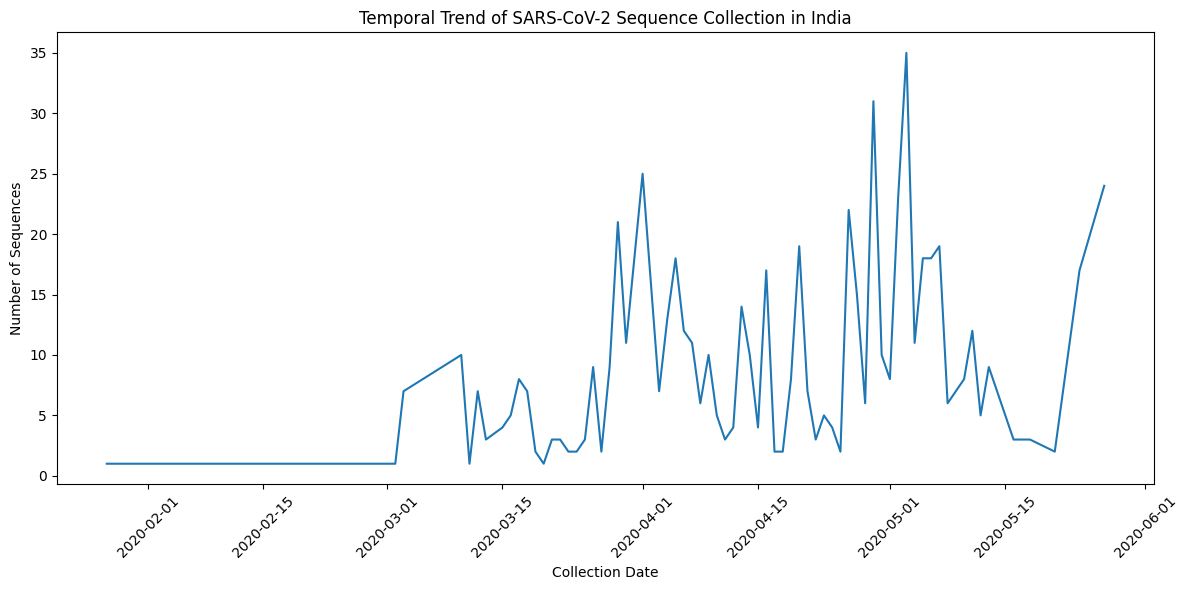

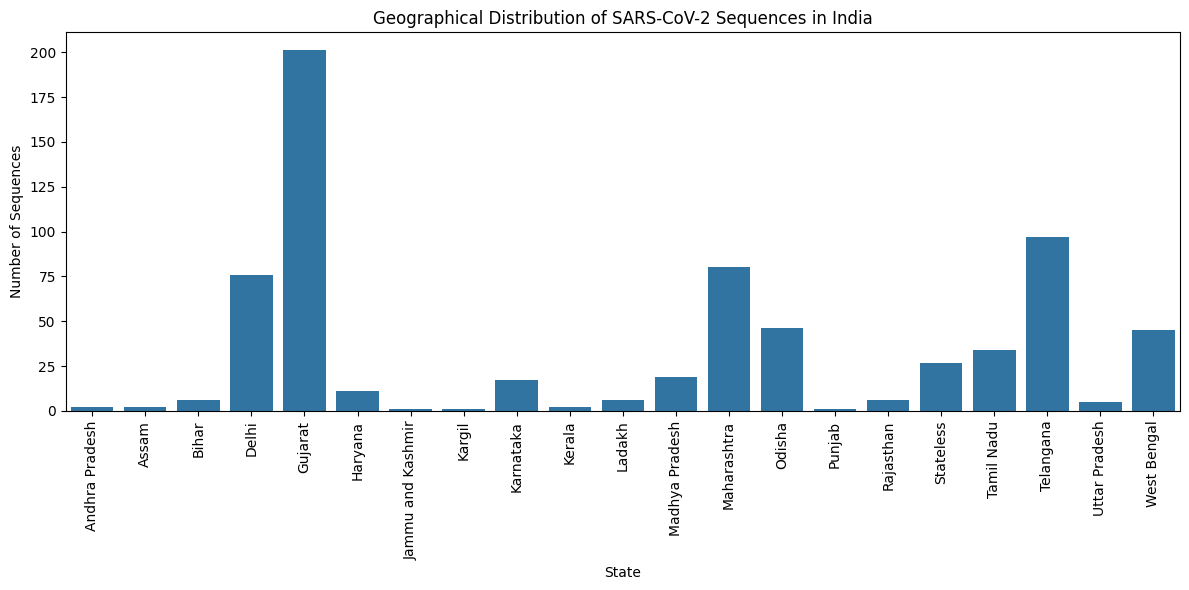

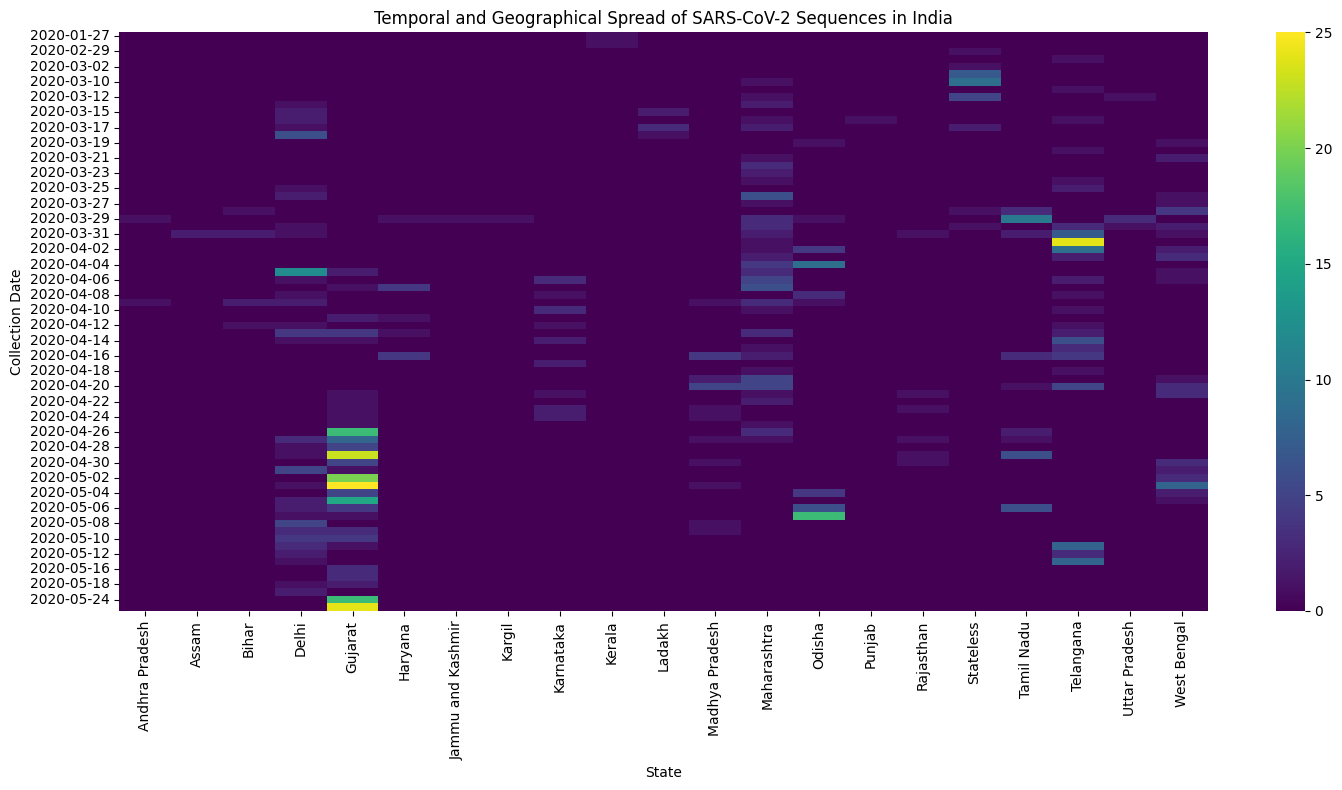

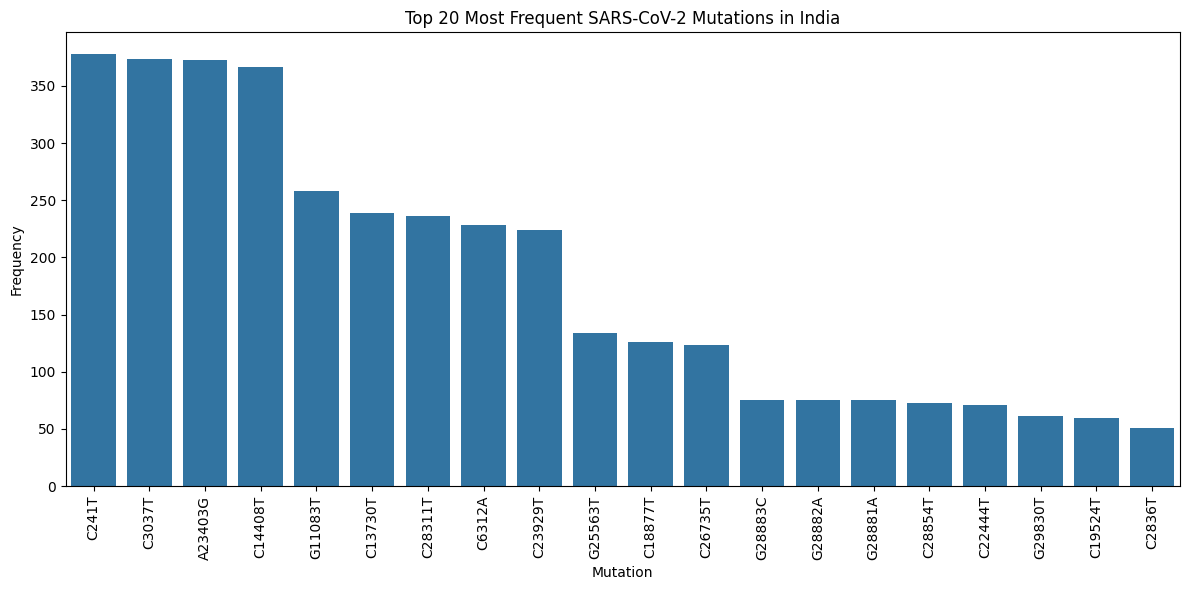

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.plot(sequence_counts.index, sequence_counts.values)
plt.xlabel('Collection Date')
plt.ylabel('Number of Sequences')
plt.title('Temporal Trend of SARS-CoV-2 Sequence Collection in India')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x=state_counts.index, y=state_counts.values)
plt.xlabel('State')
plt.ylabel('Number of Sequences')
plt.title('Geographical Distribution of SARS-CoV-2 Sequences in India')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 8))
sns.heatmap(temporal_geo_pivot, cmap='viridis')
plt.xlabel('State')
plt.ylabel('Collection Date')
plt.title('Temporal and Geographical Spread of SARS-CoV-2 Sequences in India')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Mutation', y='Count', data=top_mutations_df)
plt.xlabel('Mutation')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent SARS-CoV-2 Mutations in India')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The number of collected sequences shows a significant increase from early 2020, peaking in mid-2021, and then decreasing.
*   There is a strong unevenness in geographical distribution, with Maharashtra and Delhi having the highest number of sequences, while many states have very few.
*   The heatmap reveals that while collections started in a few states in early 2020, activity became more widespread in 2021, with different states showing peaks at different times, suggesting a complex pattern of spread.
*   Several key mutations are highly frequent, including D614G, P323L, R203K, and G1124V, indicative of the dominant viral variants circulating during the study period, likely including Alpha and Delta variants.

### Insights or Next Steps

*   Further analysis could involve correlating the temporal trends and geographical spread with public health interventions and reported case numbers to gain deeper insights into the effectiveness of measures and the true burden of the disease.
*   Investigating the co-occurrence of the top mutations could help identify the dominant circulating lineages and their spread patterns across India.
